In [25]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [26]:
import numpy as np
import pandas as pd
import datetime as dt
from matplotlib import colors
import numpy as np

# Reflect Tables into SQLAlchemy ORM

<br>
Python SQL toolkit and Object Relational Mapper

In [27]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, desc

create engine to hawaii.sqlite

In [28]:
engine = create_engine("sqlite:///hawaii.sqlite")
conn = engine.connect()

reflect an existing database into a new model

In [29]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


reflect the tables

In [130]:
Base = automap_base()
Base.prepare(engine, reflect=True)
measurement = Base.classes.measurement
session = Session(engine)
results = session.query(measurement.id, measurement.station, measurement.date, measurement.prcp, measurement.tobs).all()
measurement_df = pd.DataFrame(results)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


reflect an existing database into a new model

In [31]:
data = engine.execute("SELECT * FROM measurement")

reflect the tables

In [32]:
measurement_df = pd.read_sql("SELECT * FROM measurement", conn)
measurement_df.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [33]:
station_df = pd.read_sql("SELECT * FROM station", conn)
station_df.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


<br>
View all of the classes that automap found

In [34]:
Base = automap_base()
Base.prepare(engine, reflect=True)
Base.classes.keys()

['measurement', 'station']

<br>
Save references to each table

In [35]:
measurement = Base.classes.measurement
station = Base.classes.station

<br>
Create our session (link) from Python to the DB

In [36]:
session = Session(engine)

# Exploratory Precipitation Analysis

<br>
Find the most recent date in the data set.

In [37]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

<br>
Design a query to retrieve the last 12 months of precipitation data and plot the results. <br> 
Starting from the most recent data point in the database. <br>
Calculate the date one year from the last date in data set.

In [38]:
import datetime as dt
year_old = dt.date(2017, 8, 23) - dt.timedelta(days=365)
year_old

datetime.date(2016, 8, 23)

<br>
Perform a query to retrieve the data and precipitation scores

In [39]:
year_old_data = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= year_old).all()
year_old_data

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

<br>
Save the query results as a Pandas DataFrame and set the index to the date column <br>
Sort the dataframe by date

In [40]:
year_old_df = pd.DataFrame(year_old_data).set_index('date').sort_index()
year_old_df

,prcp
date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


<br>
Use Pandas Plotting with Matplotlib to plot the data

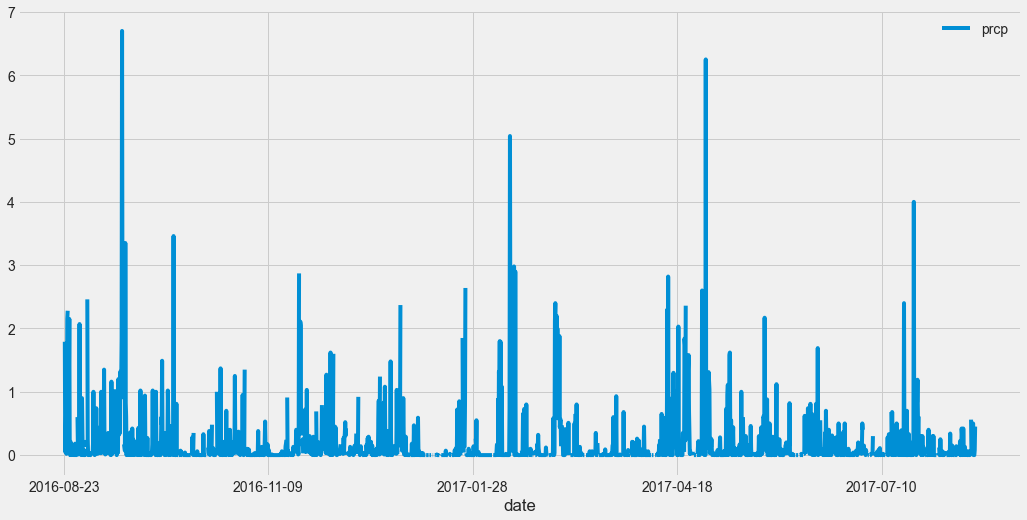

In [41]:
year_old_df.plot(figsize=(16,8))
plt.show()

<br>
Use Pandas to calcualte the summary statistics for the precipitation data

In [42]:
year_old_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

<br>
Design a query to find the most active stations (i.e. what stations have the most rows?)
List the stations and the counts in descending order.

#### Most Active Station Of All Time

In [43]:
most_active = session.query(measurement.station, func.count(measurement.station)).order_by(desc(measurement.station)).\
    group_by(measurement.station).all()
most_active

[('USC00519523', 2669),
 ('USC00519397', 2724),
 ('USC00519281', 2772),
 ('USC00518838', 511),
 ('USC00517948', 1372),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00513117', 2709),
 ('USC00511918', 1979)]

#### Most Active Station for the last year of data

In [44]:
most_active_ly = session.query(measurement.station, func.count(measurement.station)).order_by(desc(measurement.station)).\
    group_by(measurement.station).\
    filter(measurement.date >= year_old).all()
most_active_ly

[('USC00519523', 337),
 ('USC00519397', 361),
 ('USC00519281', 352),
 ('USC00517948', 183),
 ('USC00516128', 349),
 ('USC00514830', 305),
 ('USC00513117', 343)]

<br>
Design a query to calculate the total number stations in the dataset

In [45]:
station_count = session.query(measurement.station).group_by(measurement.station).count()
print(f'Total number of station is {station_count}')

Total number of station is 9


<br>
Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

In [69]:
temp = [measurement.station,
        func.min(measurement.tobs),
        func.avg(measurement.tobs),
        func.max(measurement.tobs)]
temp_data = session.query(*temp).\
    filter(measurement.station=='USC00519523').\
    group_by(measurement.station).all()
print(f'The most active station is {temp_data[0][0]}, with a minimum temperature of {temp_data[0][1]}, \n' 
      f'an average temperature of {temp_data[0][2]} and a maximum temperature of {temp_data[0][3]}')

The most active station is USC00519523, with a minimum temperature of 56.0, 
an average temperature of 74.5436493068565 and a maximum temperature of 85.0


<br>

Using the most active station id <br>
Query the last 12 months of temperature observation data for this station and plot the results as a histogram

In [47]:
USC00519523 = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == 'USC00519523').\
    filter(measurement.date >= year_old).all()
USC00519523

[('2016-08-23', 80.0),
 ('2016-08-24', 79.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 84.0),
 ('2016-08-27', 81.0),
 ('2016-08-28', 80.0),
 ('2016-08-29', 79.0),
 ('2016-08-30', 78.0),
 ('2016-08-31', 78.0),
 ('2016-09-02', 81.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 84.0),
 ('2016-09-05', 84.0),
 ('2016-09-06', 78.0),
 ('2016-09-07', 76.0),
 ('2016-09-08', 79.0),
 ('2016-09-09', 77.0),
 ('2016-09-10', 78.0),
 ('2016-09-11', 83.0),
 ('2016-09-12', 78.0),
 ('2016-09-13', 77.0),
 ('2016-09-14', 77.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 81.0),
 ('2016-09-18', 81.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 77.0),
 ('2016-09-21', 79.0),
 ('2016-09-22', 79.0),
 ('2016-09-23', 80.0),
 ('2016-09-24', 83.0),
 ('2016-09-25', 82.0),
 ('2016-09-26', 78.0),
 ('2016-09-27', 78.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 82.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 79.0),
 ('2016-10-02', 81.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 80.0),
 ('2016-10-05', 80.0),
 ('2016-10-

In [48]:
USC00519523_df = pd.DataFrame(USC00519523)

Plot the results as a histogram with bins=12.

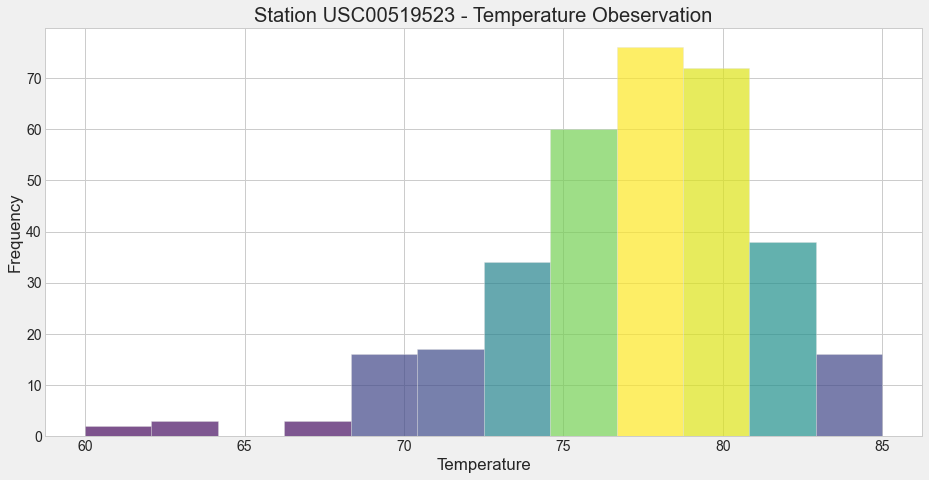

In [49]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')

n, bins, patches = plt.hist(USC00519523_df['tobs'], bins=12, facecolor='#2ab0ff', edgecolor='#e0e0e0', linewidth=0.5, alpha=0.7)

n = n.astype('int')
for i in range(len(patches)):
    patches[i].set_facecolor(plt.cm.viridis(n[i]/max(n)))

plt.title('Station USC00519523 - Temperature Obeservation')
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.show()

# Close session

In [251]:
# Close Session
session.close()